<center><img src="ignaz_semmelweis_1860_small.jpeg"></center>

Hungarian physician Dr. Ignaz Semmelweis worked at the Vienna General Hospital with childbed fever patients. Childbed fever is a deadly disease affecting women who have just given birth, and in the early 1840s, as many as 10% of the women giving birth died from it at the Vienna General Hospital. Dr.Semmelweis discovered that it was the contaminated hands of the doctors delivering the babies, and on **June 1st, 1847**, he decreed that everyone should wash their hands, an unorthodox and controversial request; nobody in Vienna knew about bacteria.

You will reanalyze the data that made Semmelweis discover the importance of handwashing and its impact on the hospital and the number of deaths.

The data is stored as two CSV files within the `data` folder.

`data/yearly_deaths_by_clinic.csv` contains the number of women giving birth at the two clinics at the Vienna General Hospital between the years 1841 and 1846.

| Column | Description |
|--------|-------------|
|`year`  |Years (1841-1846)|
|`births`|Number of births|
|`deaths`|Number of deaths|
|`clinic`|Clinic 1 or clinic 2|

`data/monthly_deaths.csv` contains data from 'Clinic 1' of the hospital where most deaths occurred.

| Column | Description |
|--------|-------------|
|`date`|Date (YYYY-MM-DD)
|`births`|Number of births|
|`deaths`|Number of deaths|

How much did handwashing reduce monthly death rates on average?

- What year had the highest yearly proportion of deaths at each clinic? Visualize the data and store the answer as an integer variable highest_year.

- Handwashing was introduced on June 1st, 1847. What are the mean proportions of deaths before and after handwashing from the monthly data? Store the result as a 2x2 DataFrame named monthly_summary with the first column, handwashing_started, being a boolean flag and the second column having the mean proportion of deaths.

- Analyze the difference in the mean monthly proportion of deaths before and after the introduction of handwashing using all of the data and calculate a 95% confidence interval. Store your answer as a pandas series confidence_interval.

In [1]:
# Imported libraries
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
yearly = pd.read_csv('data/yearly_deaths_by_clinic.csv')
yearly.head()

,year,births,deaths,clinic
0,1841,3036,237,clinic 1
1,1842,3287,518,clinic 1
2,1843,3060,274,clinic 1
3,1844,3157,260,clinic 1
4,1845,3492,241,clinic 1


In [3]:
yearly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   year    12 non-null     int64 
 1   births  12 non-null     int64 
 2   deaths  12 non-null     int64 
 3   clinic  12 non-null     object
dtypes: int64(3), object(1)
memory usage: 516.0+ bytes


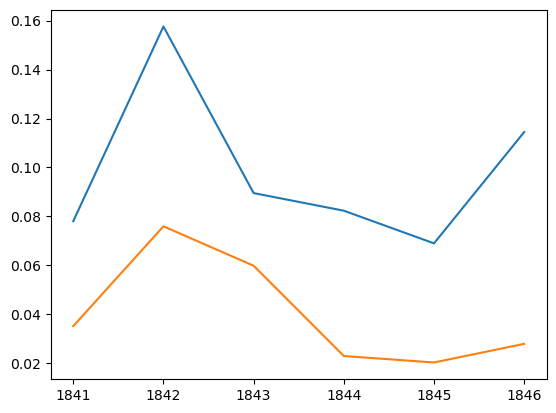

In [4]:
yearly['proportion_deaths'] = yearly['deaths'] / yearly['births']

for clinic in yearly['clinic'].unique():
    clinic_data = yearly[yearly['clinic'] == clinic]
    plt.plot(clinic_data['year'], clinic_data['proportion_deaths'], label=clinic)

In [5]:
monthly = pd.read_csv("data/monthly_deaths.csv")
monthly.head()

,date,births,deaths
0,1841-01-01,254,37
1,1841-02-01,239,18
2,1841-03-01,277,12
3,1841-04-01,255,4
4,1841-05-01,255,2


In [6]:
monthly["proportion_deaths"] = monthly["deaths"] / monthly["births"]
handwashing_start = '1847-06-01'

monthly["handwashing_started"] = monthly['date'] >= handwashing_start
monthly_summary = monthly.groupby("handwashing_started").agg(
    mean_proportion_deaths = ('proportion_deaths', 'mean')
).reset_index()

Analyze the difference in the mean monthly proportion of deaths before and after the introduction of handwashing using all of the data and calculate a 95% confidence interval. Store your answer as a pandas series confidence_interval.

In [10]:
before_washing = monthly[monthly["handwashing_started"] == False]
after_washing = monthly[monthly["handwashing_started"] == True]
before_proportion = before_washing["proportion_deaths"]
after_proportion = after_washing["proportion_deaths"]


In [11]:
boot_mean_diff = []  # Lista do przechowywania różnic średnich proporcji
for i in range(3000):  # Powtarzamy 3000 razy
    boot_before = before_proportion.sample(frac=1, replace=True)  # Próbkowanie z zamianą (bootstrap) dla danych przed myciem rąk
    boot_after = after_proportion.sample(frac=1, replace=True)  # Próbkowanie z zamianą (bootstrap) dla danych po wprowadzeniu mycia rąk
    boot_mean_diff.append( boot_after.mean() - boot_before.mean() )  # Obliczamy różnicę średnich proporcji i dodajemy do listy


 📌 **Co tutaj robimy?**

-   Tworzymy **3000 losowych próbek bootstrapowych** dla danych **przed** (`boot_before`) i **po** (`boot_after`) myciu rąk.
-   Każda próbka ma **taką samą wielkość jak oryginalne dane**, ale wartości mogą się powtarzać (**próbkowanie z zamianą**).
-   Obliczamy różnicę średnich proporcji zgonów i zapisujemy do listy `boot_mean_diff`.

🔄 **Dlaczego bootstrap?**

-   Pozwala oszacować **rozrzut różnicy** proporcji śmiertelności bez zakładania konkretnego rozkładu danych.
-   Działa dobrze nawet dla **małych zbiorów danych**.



In [12]:
# Obliczamy percentyle 2.5% i 97.5%
confidence_interval = pd.Series(boot_mean_diff).quantile([0.025, 0.975])
print(confidence_interval)


0.025   -0.101360
0.975   -0.067529
dtype: float64


-   Tworzymy **rozkład empiryczny** z `boot_mean_diff`.
-   Obliczamy **percentyle**:
    -   **2.5%** → dolna granica przedziału ufności (wartość, poniżej której leży 2.5% wyników).
    -   **97.5%** → górna granica przedziału ufności (wartość, powyżej której leży 2.5% wyników).
-   Wyświetlamy **przedział ufności**, który mówi nam, w jakim zakresie znajduje się rzeczywista różnica proporcji w 95% przypadków.



-   Jeśli przedział ufności **nie zawiera zera**, oznacza to, że **mycie rąk znacząco zmniejszyło śmiertelność**.
-   Jeśli przedział zawiera zero, to nie mamy wystarczających dowodów na istotność różnicy.



# Solution

In [ ]:
# Imported libraries
import pandas as pd
import matplotlib.pyplot as plt

# What year had the highest yearly proportion of deaths at each clinic?

# Load and inspect the yearly data
yearly = pd.read_csv('data/yearly_deaths_by_clinic.csv')
yearly.head()

# Add proportion_deaths to the DataFrames
yearly["proportion_deaths"] = yearly["deaths"] / yearly["births"]

# Plot the year versus proportion deaths and separate by clinic using a for loop
# You may prefer to identify the year without using a visualization, that's fine too!
for clinic in yearly['clinic'].unique():
    clinic_data = yearly[yearly['clinic'] == clinic]
    plt.plot(clinic_data['year'], clinic_data['proportion_deaths'], label=clinic)

# This code is optional but makes your visualization look neater and  readable
# plt.xlabel('Year')
# plt.ylabel('Proportion of Deaths')
# plt.title('Year vs Proportion of Deaths by Clinic')
# plt.legend(title='Clinic')
# plt.grid(True)
# plt.show()

# Identify the highest year in the visualization and save the integer year
highest_year = 1842

# What are the mean proportions of deaths before and after handwashing from the monthly data?
# Load and inspect the monthly data
monthly = pd.read_csv("data/monthly_deaths.csv")
monthly.head()

# Add proportion_deaths to the DataFrame
monthly["proportion_deaths"] = monthly["deaths"] / monthly["births"]

# Add the threshold as the date handwashing was introduced
handwashing_start = '1847-06-01'

# Create a boolean column that shows True after the date handwashing was introduced
monthly['handwashing_started'] = monthly['date'] >= handwashing_start

# Group by the new boolean column calculate the mean proportion of deaths
# Reset the index to store the result as a DataFrame
monthly_summary = monthly.groupby('handwashing_started').agg(
    mean_proportion_deaths=('proportion_deaths', 'mean')
).reset_index()

print(monthly_summary)

# Analyze the difference in the mean monthly proportion of deaths and calculate a 95% confidence interval

# Split the monthly data into before and after handwashing was introduced
before_washing = monthly[monthly["date"] < handwashing_start]
after_washing = monthly[monthly["date"] >= handwashing_start]
before_proportion = before_washing["proportion_deaths"]
after_proportion = after_washing["proportion_deaths"]

# Perform a bootstrap analysis of the reduction of deaths due to handwashing
boot_mean_diff = []
for i in range(3000):
    boot_before = before_proportion.sample(frac=1, replace=True)
    boot_after = after_proportion.sample(frac=1, replace=True)
    boot_mean_diff.append( boot_after.mean() - boot_before.mean() )

# Calculate a 95% confidence interval
confidence_interval = pd.Series(boot_mean_diff).quantile([0.025, 0.975])
print(confidence_interval)